# comparing models behavior with participants behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import ast


In [2]:
output_dir = r"15_RL_agent_TDlearn_output_behavior"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'
folder_path_colors = '11_RL_agent_TDlearn_output/model_behavior'
folder_path_numbers = '12_RL_agent_TDlearn_output/model_behavior'
folder_path_colors_numbers = '13_RL_agent_TDlearn_output/model_behavior'


df_participants = []
df_colors = []
df_numbers = []
df_colors_numbers = []


def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True)  
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)


        find_matching_csv(folder_path_colors, df_colors)
        find_matching_csv(folder_path_numbers, df_numbers)
        find_matching_csv(folder_path_colors_numbers, df_colors_numbers)


In [3]:
df_participants[2].head(5)

arrowRT distribution  interTrialInterval outcome  myCard  yourCard  spaceRT  \
0    1031      uniform                 892    lose       9         2     2913   
1    2032      uniform                 908    lose       4         9    11302   
2    1095      uniform                 898    lose       4         7     1170   
3     723      uniform                 970    lose       1         5     2098   
4    2334      uniform                 841    lose       1         3     8014   

  totalReward  trialIndex trialType     choice  block  timeoutRepeat   risk  
0         9.5           2  response  arrowdown      1              0  0.000  
1           9           3  response    arrowup      1              0  0.375  
2         8.5           4  response    arrowup      1              0  0.375  
3           8           5  response    arrowup      1              0  0.000  
4         7.5           6  response    arrowup      1              0  0.000

In [4]:
df_colors[2].head(5)

model_choices  participant_choices  model_total_reward  \
0              1                    0                10.5   
1              1                    1                10.0   
2              0                    1                10.5   
3              0                    1                11.0   
4              0                    1                11.5   

   participant_total_reward                                              q_val  
0                       9.5  [[-0.12322150798303586, 0.017257467260049387],...  
1                       9.0  [[-0.12322150798303586, -0.12309984565878272],...  
2                       8.5  [[-0.12322150798303586, -0.22537133761470396],...  
3                       8.0  [[-0.12322150798303586, -0.2998915592503142], ...  
4                       7.5  [[-0.12322150798303586, -0.3541907908975255], ...

In [5]:
df_numbers[2].head()

model_choices  participant_choices  model_total_reward  \
0              1                    0                10.5   
1              0                    1                11.0   
2              0                    1                11.5   
3              0                    1                12.0   
4              0                    1                12.5   

   participant_total_reward                                              q_val  
0                       9.5  [[-0.005786009774610761, -0.000356453847500772...  
1                       9.0  [[-0.005786009774610761, -0.000356453847500772...  
2                       8.5  [[-0.005786009774610761, -0.000356453847500772...  
3                       8.0  [[-0.005786009774610761, -0.03881896897685854]...  
4                       7.5  [[-0.005786009774610761, -0.07432064315976976]...

In [6]:
df_colors_numbers[2].head(5)

model_choices  participant_choices  model_total_reward  \
0              1                    0                10.5   
1              0                    1                11.0   
2              0                    1                11.5   
3              0                    1                12.0   
4              0                    1                12.5   

   participant_total_reward                                              q_val  
0                       9.5  [[[-0.02043867387785598, -0.000672324798613683...  
1                       9.0  [[[-0.02043867387785598, -0.000672324798613683...  
2                       8.5  [[[-0.02043867387785598, -0.000672324798613683...  
3                       8.0  [[[-0.02043867387785598, -0.1263941932299605],...  
4                       7.5  [[[-0.02043867387785598, -0.22046152099220845]...

# total reward:

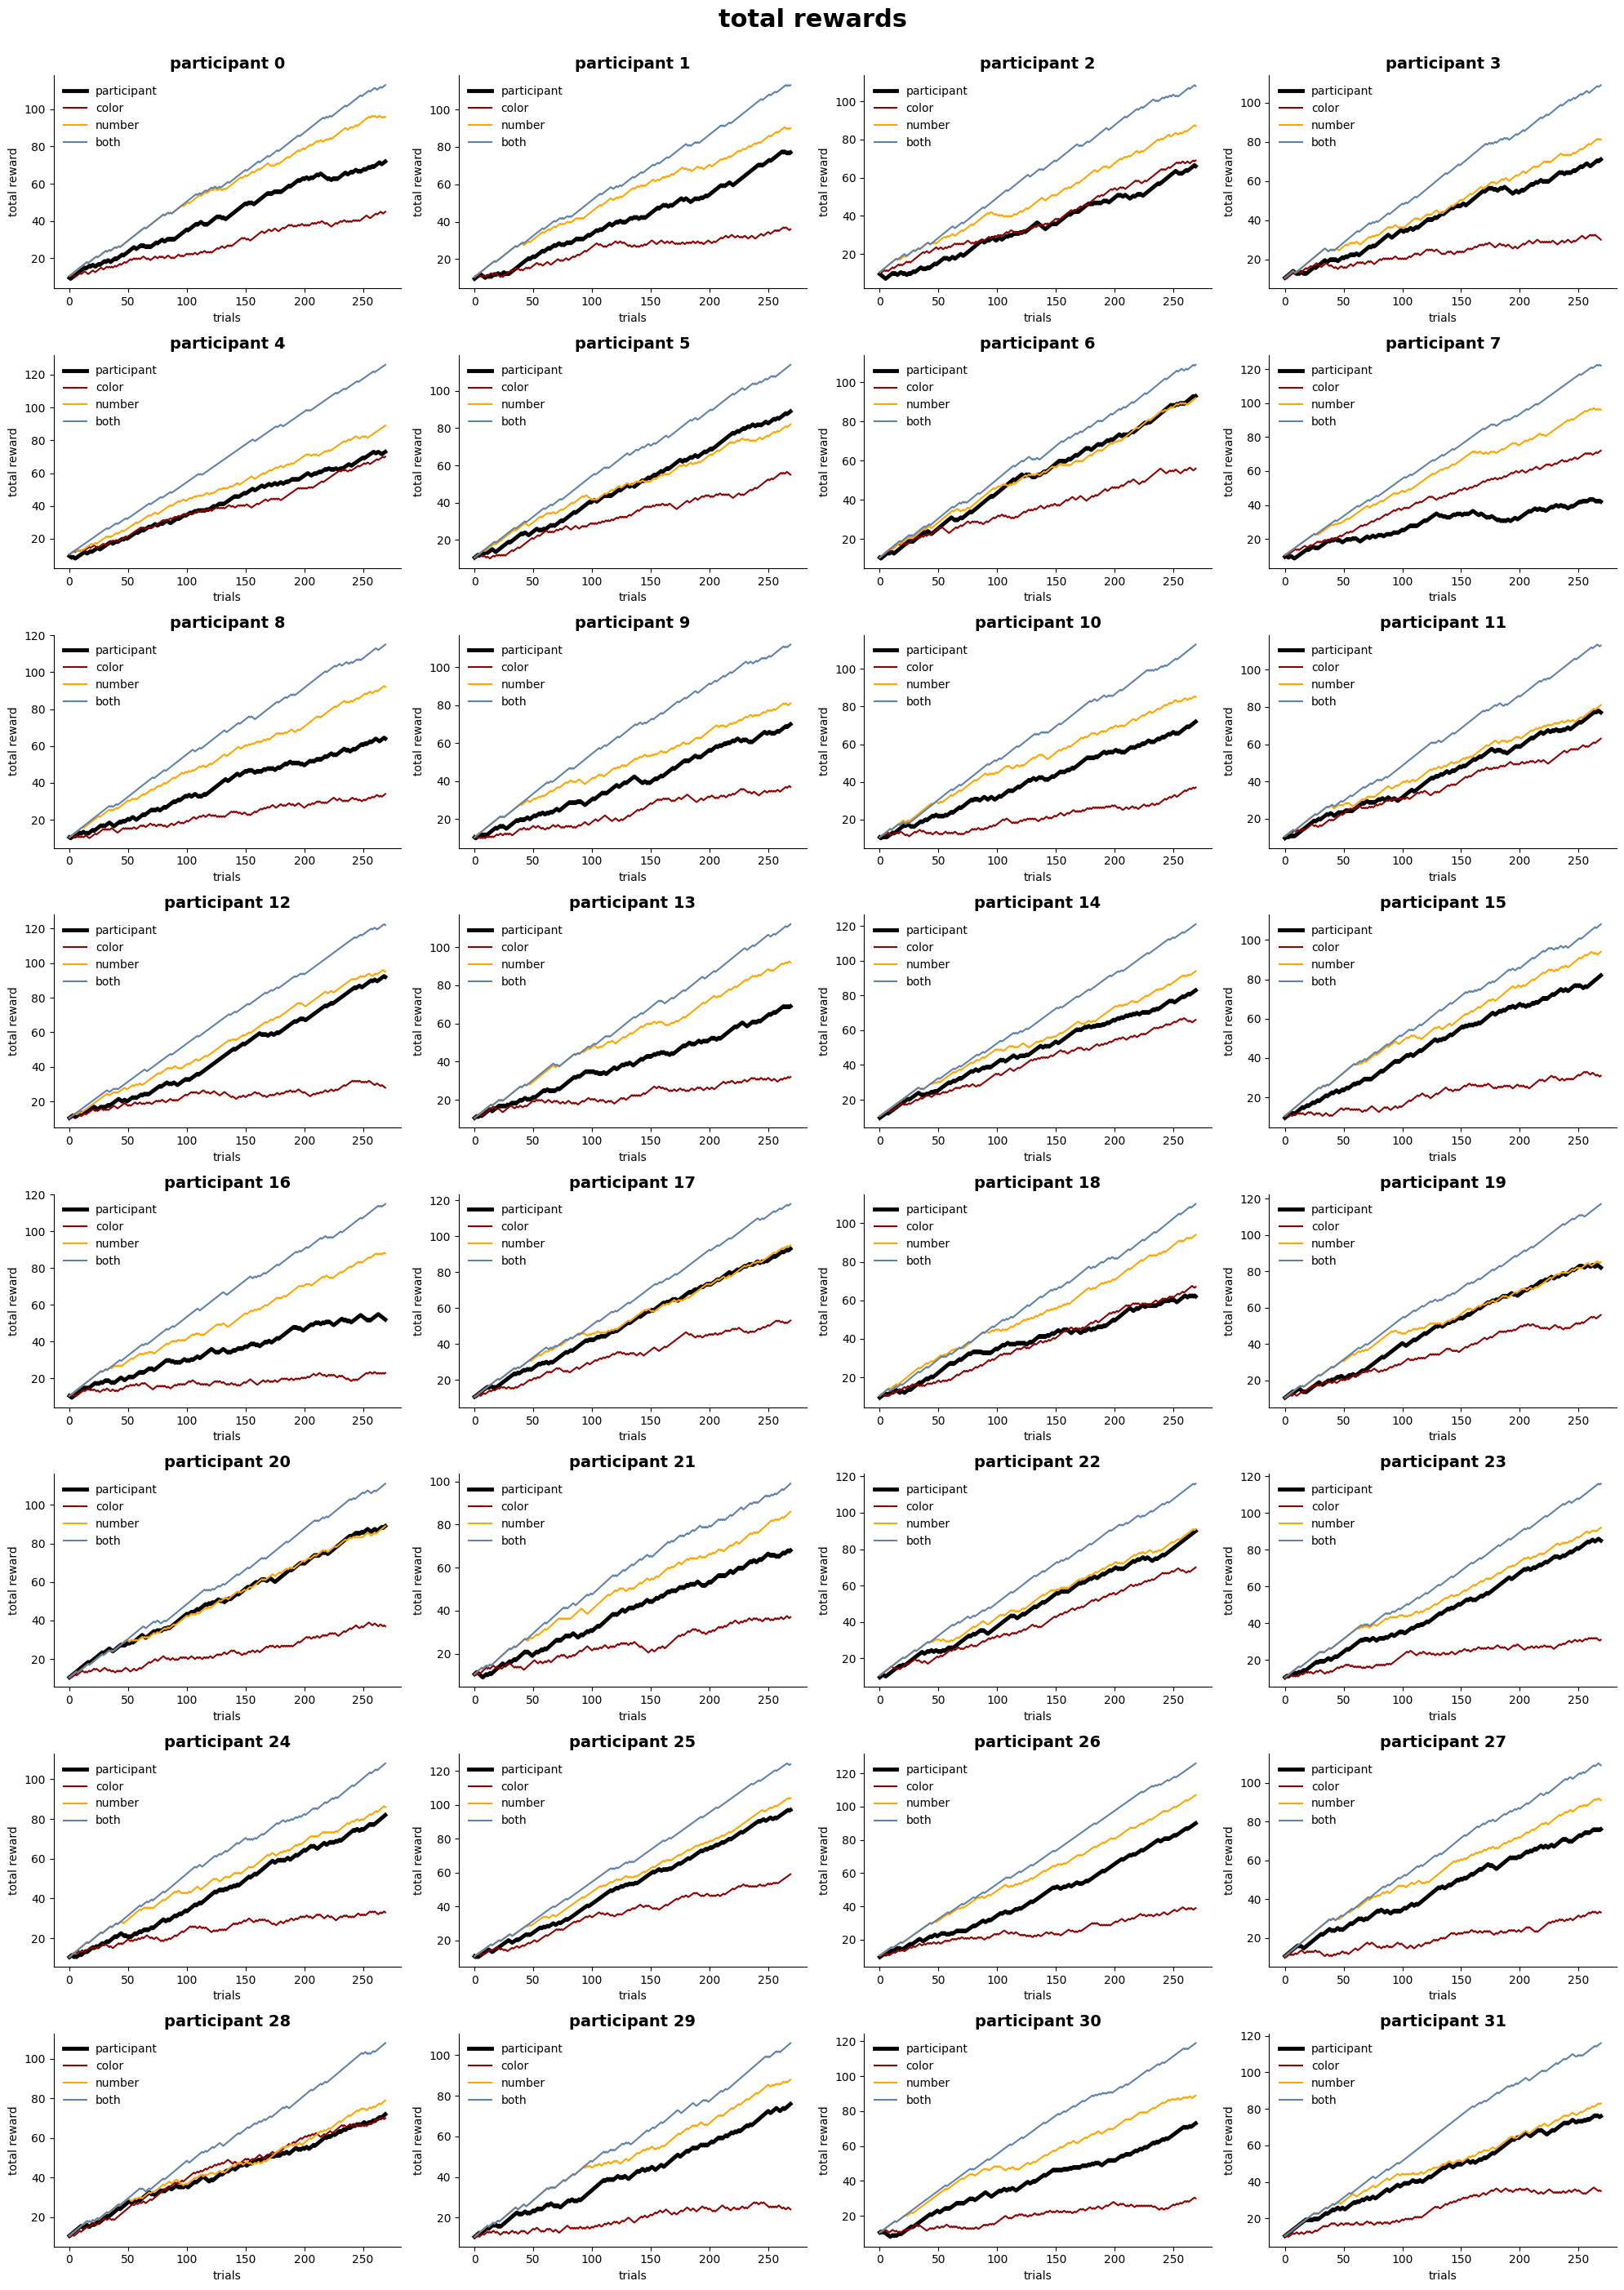

In [7]:
num_subplots = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 28))
axes = axes.flatten()


colors = ['black', '#8b0000', 'orange', '#5e81ac']
labels = ['participant', 'color', 'number', 'both']

for i in range(num_subplots):
    ax = axes[i]

    ax.plot(range(trial_num), df_participants[i]['totalReward'], label=labels[0], color=colors[0], linewidth=3.5)
    ax.plot(range(trial_num), df_colors[i]['model_total_reward'], label=labels[1], color=colors[1])
    ax.plot(range(trial_num), df_numbers[i]['model_total_reward'], label=labels[2], color=colors[2])
    ax.plot(range(trial_num), df_colors_numbers[i]['model_total_reward'], label=labels[3], color=colors[3])

    ax.set_title(f'participant {i}' , fontsize=14, fontweight='bold')
    ax.set_xlabel('trials')
    ax.set_ylabel('total reward')
    ax.legend(frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('total rewards', fontsize=22, fontweight='bold', y=1)

plt.tight_layout(rect=[0, 0, 1, 1]) 

filename = os.path.join(output_dir, "total_reward.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# q-val trends colors model:
I wanna find delta_q vals for arrow up and arrowdown.
 each q_val_number_dist_choice column has q val matrices that are 3 x 2. For 3 uniform, low, high distributions and arrow down and arrow up actions. this is the map from code 11:

distributions_map = { "uniform": 0, "low": 1,  "high": 2}

actions = { "arrowdown": 0, "arrowup": 1}

# attention: I'm looking at q-val (arrowup) - q-val (arrow down)

### first we need to do some preprocessing.

In [8]:
distributions_map = { "uniform": 0, "low": 1,  "high": 2}

actions = { "arrowdown": 0, "arrowup": 1}

down_up_participant_choice = []
delta_q_val_uniform = []
delta_q_val_low = []
delta_q_val_high = []

for df in df_colors:
    temp_vec = np.array(df['participant_choices'], dtype=float)

    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    down_up_participant_choice.append(temp_vec)
    
    delta_uniform = []
    delta_low = []
    delta_high = []
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_uniform.append(delta[distributions_map["uniform"]])
        delta_low.append(delta[distributions_map["low"]])
        delta_high.append(delta[distributions_map["high"]])

    delta_q_val_uniform.append(delta_uniform)
    delta_q_val_low.append(delta_low)
    delta_q_val_high.append(delta_high)
        
    


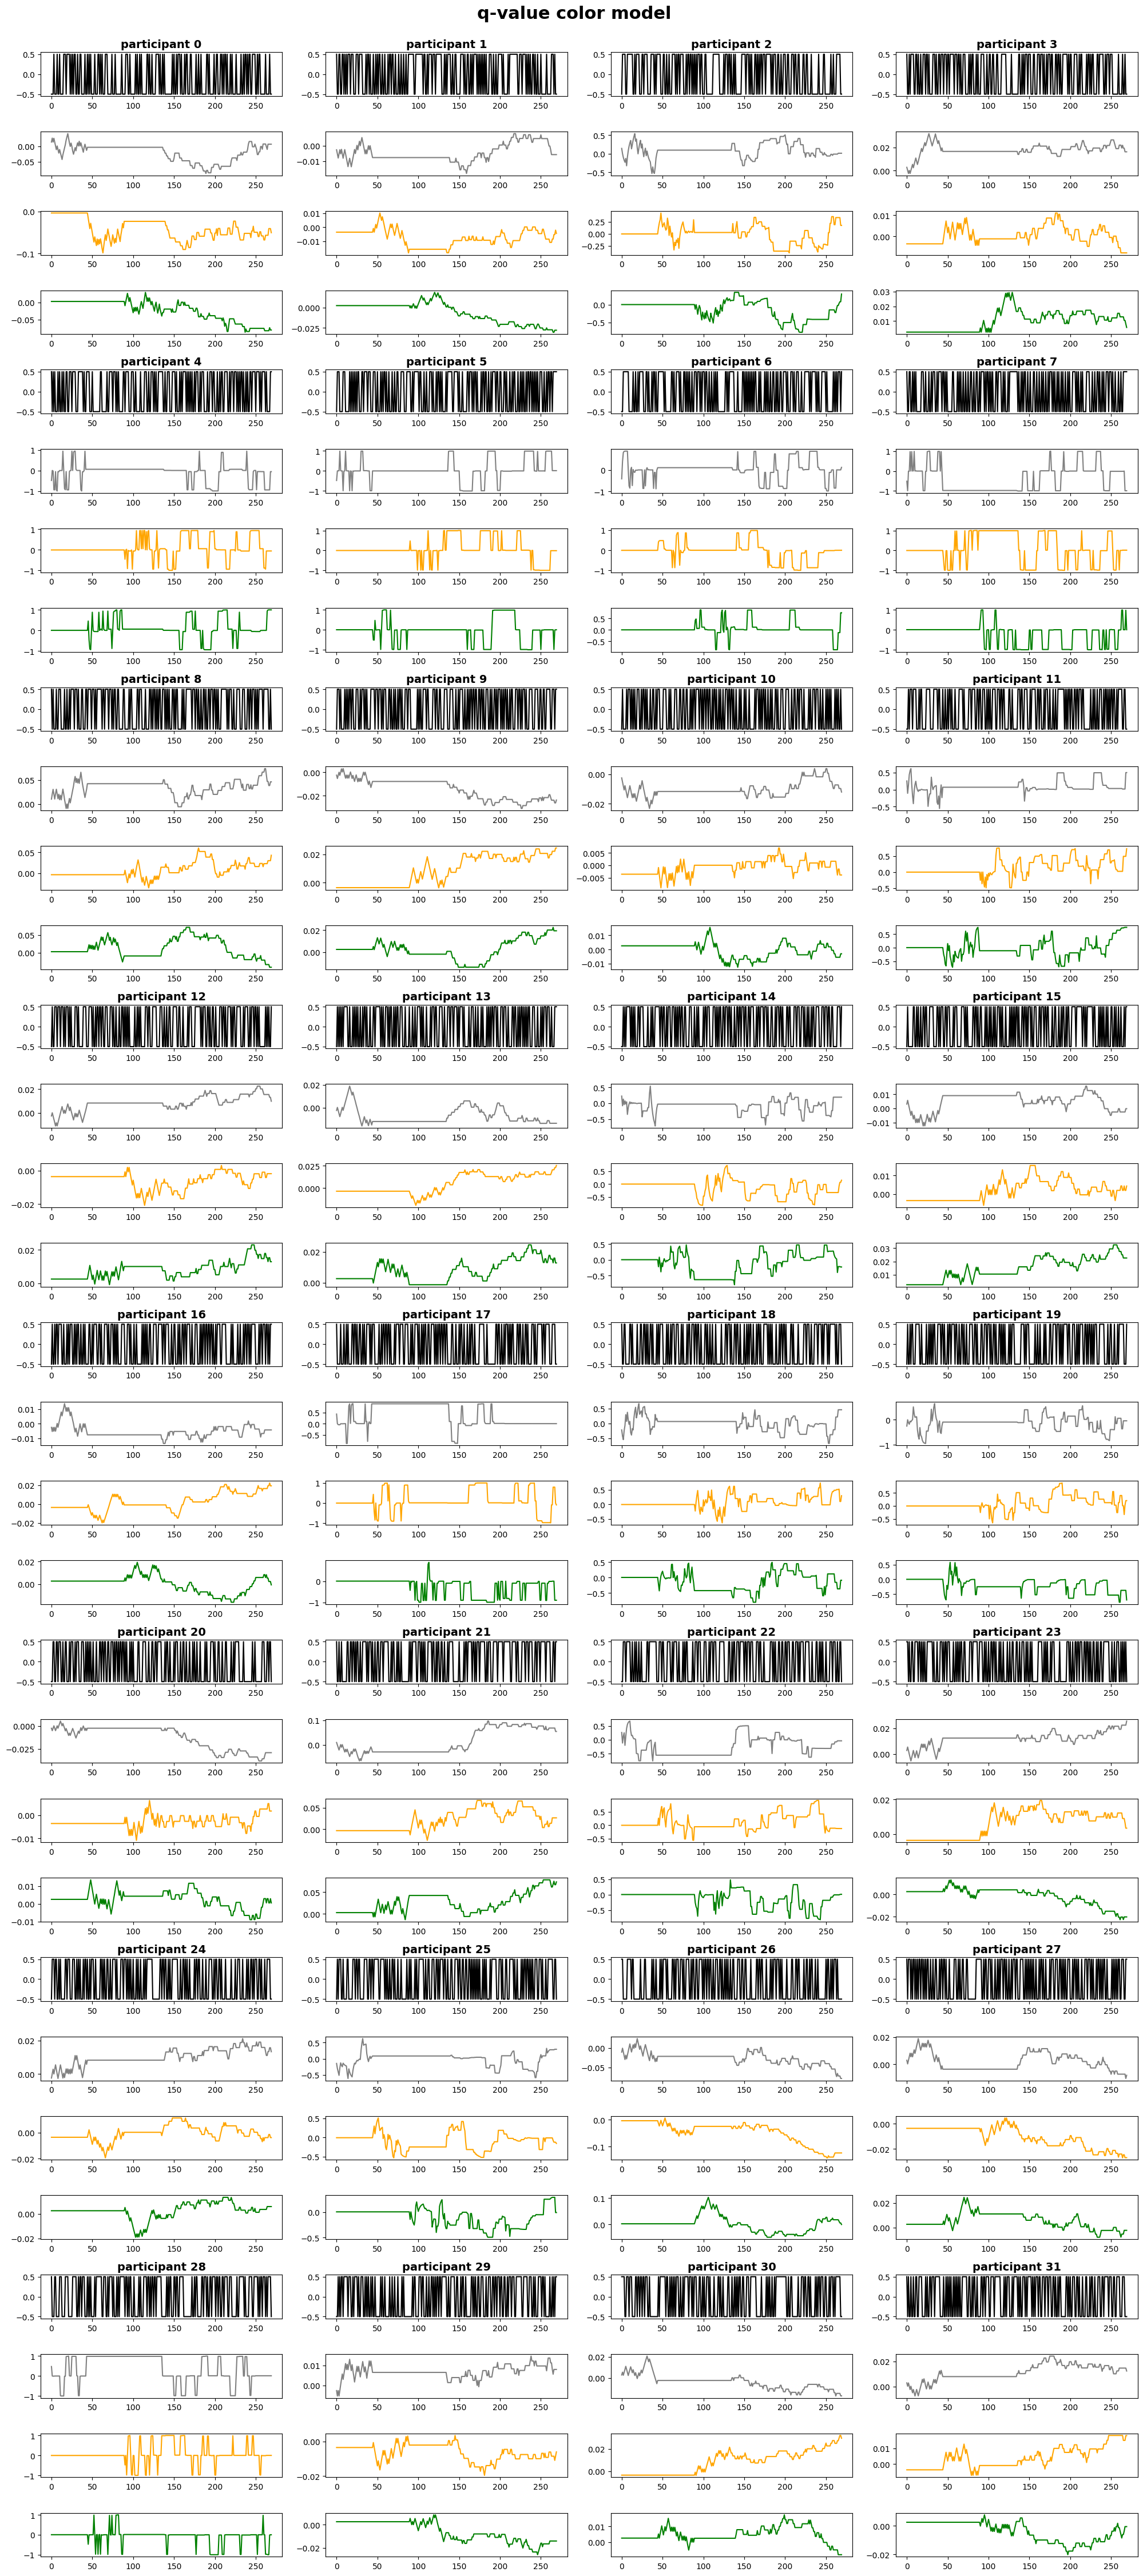

In [9]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

# Create subplots: 8 rows, 4 columns (grid for all participant plots)
fig, axes = plt.subplots(nrows=8 * 4, ncols=4, figsize=(20, 45))

axes = np.array(axes).flatten()

vector_data = [down_up_participant_choice, delta_q_val_uniform, delta_q_val_low, delta_q_val_high]

x = np.arange(trial_num)

for i in range(num_participants):
    col = i % 4 
    row_start = (i // 4) * 4  
    
    for j in range(4):  
        ax_index = (row_start + j) * 4 + col  
        ax = axes[ax_index]

        vec = vector_data[j][i]  # get the j-th vector for participant i
        
        ax.plot(x, vec, color=['black', 'gray', 'orange', 'green'][j])


        #  title the top-most subplot in each participant's section only
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold')




fig.suptitle('q-value color model', fontsize=22, fontweight='bold', y =1)
plt.tight_layout()

filename = os.path.join(output_dir, "q_val_color.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# q-val trends number model:
I wanna find delta_q vals for arrow up and arrowdown.
 each q_val_number_dist_choice column has q val matrices that are 9x2. 9 numbers and 2 actions: arrow down and arrow up actions.
 remembers that numbers are from 1 to 9, but indices are from 0 8 in q val.

 # preprocessing:

In [10]:
down_up_participant_choice = []
delta_q_val_1 = []
delta_q_val_2 = []
delta_q_val_3 = []
delta_q_val_4 = []
delta_q_val_5 = []
delta_q_val_6 = []
delta_q_val_7 = []
delta_q_val_8 = []
delta_q_val_9 = []

for df in df_numbers:
    temp_vec = np.array(df['participant_choices'], dtype=float)

    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    down_up_participant_choice.append(temp_vec)

    delta_1 = []
    delta_2 = []
    delta_3 = []
    delta_4 = []
    delta_5 = []
    delta_6 = []
    delta_7 = []
    delta_8 = []
    delta_9 = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, actions["arrowup"]] - temp_vec2[:, actions["arrowdown"]]
        delta_1.append(delta[0])
        delta_2.append(delta[1])
        delta_3.append(delta[2])
        delta_4.append(delta[3])
        delta_5.append(delta[4])
        delta_6.append(delta[5])
        delta_7.append(delta[6])
        delta_8.append(delta[7])
        delta_9.append(delta[8])
        
        

    delta_q_val_1.append(delta_1)
    delta_q_val_2.append(delta_2)
    delta_q_val_3.append(delta_3)
    delta_q_val_4.append(delta_4)
    delta_q_val_5.append(delta_5)
    delta_q_val_6.append(delta_6)
    delta_q_val_7.append(delta_7)
    delta_q_val_8.append(delta_8)
    delta_q_val_9.append(delta_9)
        
    


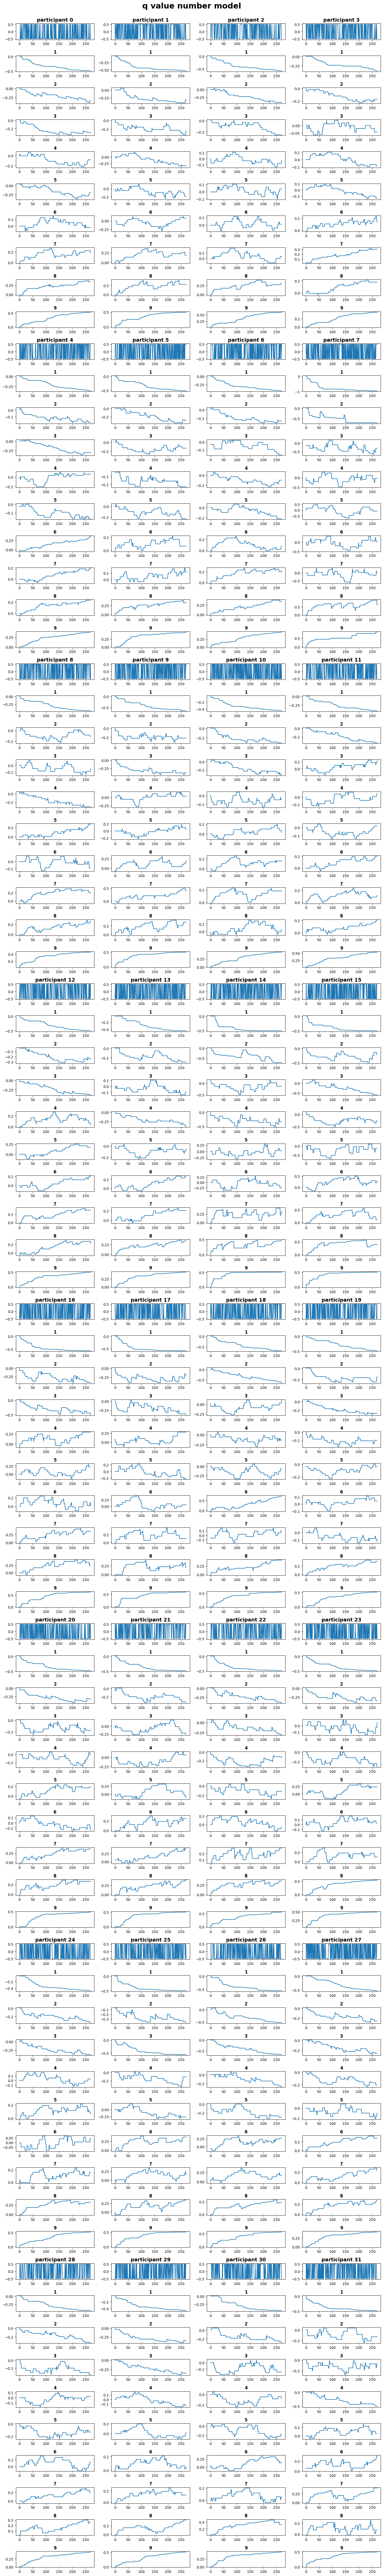

In [11]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=8 * 10, ncols=4, figsize=(15, 100))

axes = np.array(axes).flatten()

vector_data = [down_up_participant_choice, delta_q_val_1, delta_q_val_2, 
               delta_q_val_3, delta_q_val_4, delta_q_val_5, delta_q_val_6, 
               delta_q_val_7, delta_q_val_8, delta_q_val_9]

x = np.arange(trial_num)
# color_palette = ['black', 'gray', 'orange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'cyan']

for i in range(num_participants):
    col = i % 4  
    row_start = (i // 4) * 10  # startinggggggg row for this participant (now 10 subplots per participant)

    for j in range(10):  
        ax_index = (row_start + j) * 4 + col  #  index for this subplot
        ax = axes[ax_index]

        vec = vector_data[j][i]  #  the j th vector for participant i
        
        ax.plot(x, vec)

        # have title on the top-most subplot for each participant
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold') 
        else:
            ax.set_title(f'{j}', fontsize=12, fontweight='bold') 

fig.suptitle('q value number model', fontsize=22, fontweight='bold', y=1)
plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "q_val_number.pdf")
plt.savefig(filename, format='pdf')

plt.show()


# q-val trends both colors and numbers model:
I wanna find delta_q vals for arrow up and arrowdown. and then find delta q val (up - down)

# preprocessing:

In [12]:
down_up_participant_choice_both = []
delta_q_val_1_both = []
delta_q_val_2_both = []
delta_q_val_3_both = []
delta_q_val_4_both = []
delta_q_val_5_both = []
delta_q_val_6_both = []
delta_q_val_7_both = []
delta_q_val_8_both = []
delta_q_val_9_both = []

for df in df_colors_numbers:
    temp_vec = np.array(df['participant_choices'], dtype=float)
    temp_vec[temp_vec == 0] = -0.5
    temp_vec[temp_vec == 1] = 0.5
    temp_vec = np.stack([temp_vec] * 3, axis=-1)
    # print(np.shape(temp_vec))
    down_up_participant_choice_both.append(temp_vec)

    

    delta_1_both = []
    delta_2_both = []
    delta_3_both = []
    delta_4_both = []
    delta_5_both = []
    delta_6_both = []
    delta_7_both = []
    delta_8_both = []
    delta_9_both = []
    
    temp_df = df['q_val']
    for q_vals in temp_df:
        
        temp_vec2 = np.array(ast.literal_eval(q_vals)) 
        delta = temp_vec2[:, :, actions["arrowup"]].squeeze() - temp_vec2[:, :, actions["arrowdown"]].squeeze()
        delta_1_both.append(delta[0][:])
        delta_2_both.append(delta[1][:])
        delta_3_both.append(delta[2][:])
        delta_4_both.append(delta[3][:])
        delta_5_both.append(delta[4][:])
        delta_6_both.append(delta[5][:])
        delta_7_both.append(delta[6][:])
        delta_8_both.append(delta[7][:])
        delta_9_both.append(delta[8][:])
        
        

    delta_q_val_1_both.append(delta_1_both)
    delta_q_val_2_both.append(delta_2_both)
    delta_q_val_3_both.append(delta_3_both)
    delta_q_val_4_both.append(delta_4_both)
    delta_q_val_5_both.append(delta_5_both)
    delta_q_val_6_both.append(delta_6_both)
    delta_q_val_7_both.append(delta_7_both)
    delta_q_val_8_both.append(delta_8_both)
    delta_q_val_9_both.append(delta_9_both)
        
    


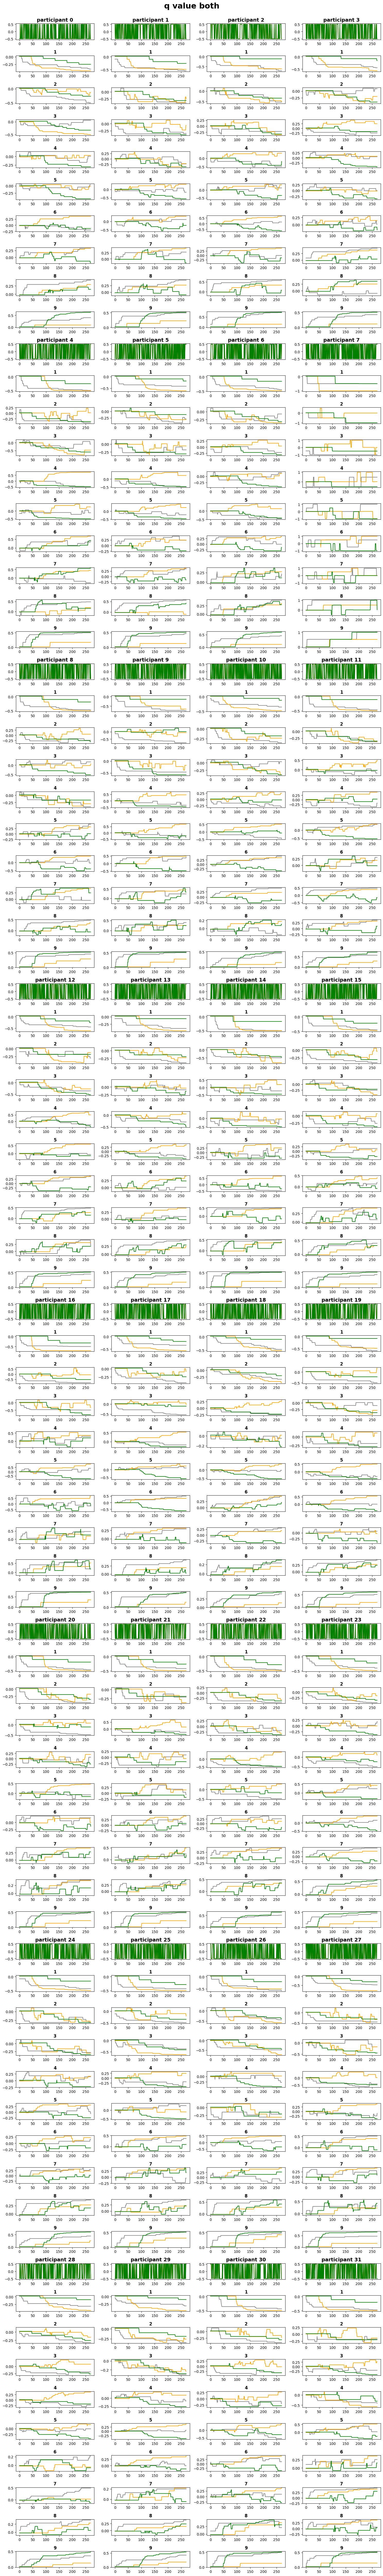

In [13]:
num_participants = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=8 * 10, ncols=4, figsize=(15, 100))

axes = np.array(axes).flatten()

vector_data_both = [down_up_participant_choice_both, delta_q_val_1_both, delta_q_val_2_both, 
               delta_q_val_3_both, delta_q_val_4_both, delta_q_val_5_both, delta_q_val_6_both, 
               delta_q_val_7_both, delta_q_val_8_both, delta_q_val_9_both]

x = np.arange(trial_num)
color_palette = [ 'gray', 'orange', 'green']

for i in range(num_participants):
    col = i % 4  
    row_start = (i // 4) * 10  # startinggggggg row for this participant (now 10 subplots per participant)

    for j in range(10):  
        ax_index = (row_start + j) * 4 + col  #  index for this subplot
        ax = axes[ax_index]

        vec = np.array(vector_data_both[j][i])
        
        ax.plot(x, vec[:,distributions_map["uniform"]], color = 'gray')
        ax.plot(x, vec[:,distributions_map["low"]], color = 'orange')
        ax.plot(x, vec[:,distributions_map["high"]], color = 'green')

        # have title on the top-most subplot for each participant
        if j == 0:
            ax.set_title(f'participant {i}', fontsize=14, fontweight='bold') 
        else:
            ax.set_title(f'{j}', fontsize=12, fontweight='bold') 

fig.suptitle('q value both', fontsize=22, fontweight='bold', y=1)
plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "q_val_both.pdf")
plt.savefig(filename, format='pdf')

plt.show()
